## **Práctica 16: Clasificación múltiple (vinos)**

Nombre: Angel Damian Monroy Mendoza

Nro. Cuenta: 316040707

Email: adamianmm@gmail.com

### **Contexto**

Existen dos conjuntos de datos están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde".
Hoy en día, el vino es disfrutado cada vez más por una gama más amplia de consumidores. El "Vinho Verde" de Portugal ha tenido crecimiento en sus exportaciones, por lo que se vuelve de interés el garantizar la calidad el mismo.

**Objetivo:** Encontrar información de interés para clasificar la calidad de un vino tinto.


**Fuente de datos**
Variables de entrada (basadas en pruebas fisicoquímicas):

* 1 - fixed acidity (tartaric acid - g / dm^3)
* 2 - volatile acidity (acetic acid - g / dm^3)
* 3 - citric acid (g / dm^3)
* 4 - residual sugar (g / dm^3)
* 5 - chlorides (sodium chloride - g / dm^3
* 6 - free sulfur dioxide (mg / dm^3)
* 7 - total sulfur dioxide (mg / dm^3)
* 8 - density (g / cm^3)
* 9 - pH
* 10 - sulphates (potassium sulphate - g / dm3)
* 11 - alcohol (% by volume) 
* 12 - quality (score between 0 and 10)

# **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [4]:
url='https://raw.githubusercontent.com/aDamianMonroym/Mineria-de-Datos/main/Datos/wineQualityReds.csv'
Vinos = pd.read_csv(url, index_col = 'Unnamed: 0')
Vinos

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
Vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
print(Vinos.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [7]:
Vinos.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

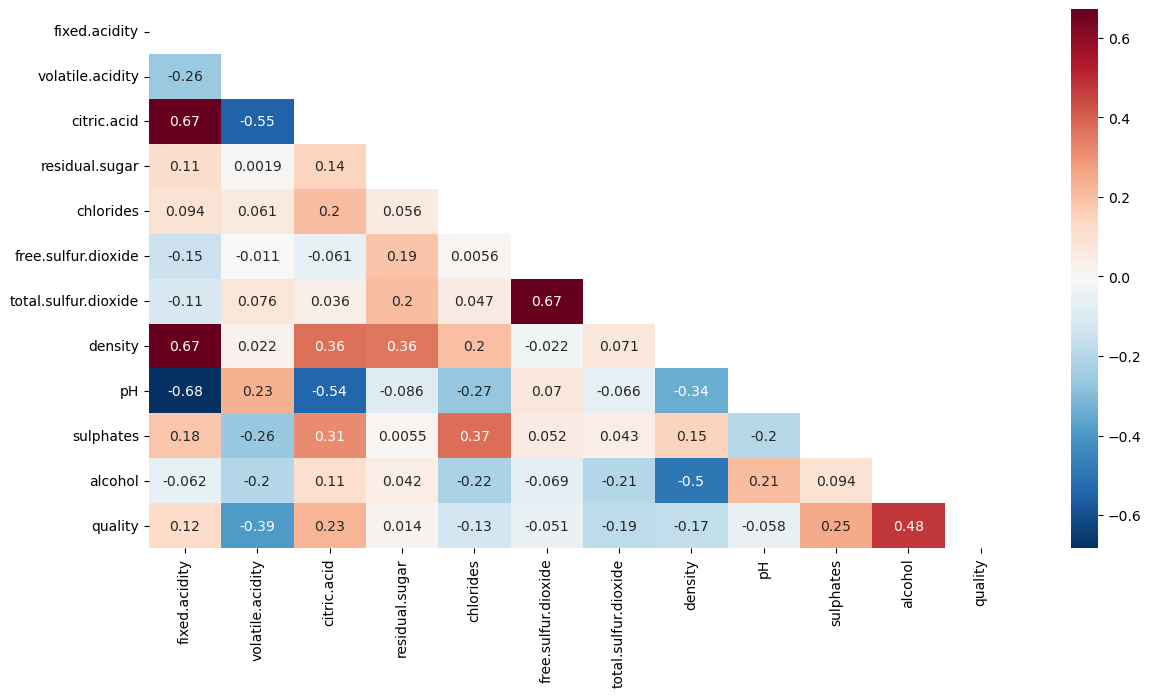

In [8]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Vinos.corr())
sns.heatmap(Vinos.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

Debido a los resultados alcanzados en una práctica anterior, por medio del Análisis de Componentes Principales se obtuvieron las que las variables más representativas eran:
* fixed.acidity.
* residual.sugar.
* chlorides.
* free.sulfur.dioxide.
* sulphates.
* alcohol.

In [9]:
MatrizVinos = np.array(Vinos[['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol']])
pd.DataFrame(MatrizVinos)

,0,1,2,3,4,5
0,7.4,1.9,0.076,11.0,0.56,9.4
1,7.8,2.6,0.098,25.0,0.68,9.8
2,7.8,2.3,0.092,15.0,0.65,9.8
3,11.2,1.9,0.075,17.0,0.58,9.8
4,7.4,1.9,0.076,11.0,0.56,9.4
...,...,...,...,...,...,...
1594,6.2,2.0,0.090,32.0,0.58,10.5
1595,5.9,2.2,0.062,39.0,0.76,11.2
1596,6.3,2.3,0.076,29.0,0.75,11.0
1597,5.9,2.0,0.075,32.0,0.71,10.2


# II Modelo Híbrido

## K-Means

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                               # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(MatrizVinos)   # Se calculan la media y desviación y se escalan los datos

In [11]:
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5
0,-0.528360,-0.453218,-0.243707,-0.466193,-0.579207,-0.960246
1,-0.298547,0.043416,0.223875,0.872638,0.128950,-0.584777
2,-0.298547,-0.169427,0.096353,-0.083669,-0.048089,-0.584777
3,1.654856,-0.453218,-0.264960,0.107592,-0.461180,-0.584777
4,-0.528360,-0.453218,-0.243707,-0.466193,-0.579207,-0.960246
...,...,...,...,...,...,...
1594,-1.217796,-0.382271,0.053845,1.542054,-0.461180,0.072294
1595,-1.390155,-0.240375,-0.541259,2.211469,0.601055,0.729364
1596,-1.160343,-0.169427,-0.243707,1.255161,0.542042,0.541630
1597,-1.390155,-0.382271,-0.264960,1.542054,0.305990,-0.209308


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min #Importamos las métricas para obtener las distancias utilizadas en el algoritmo

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-pa

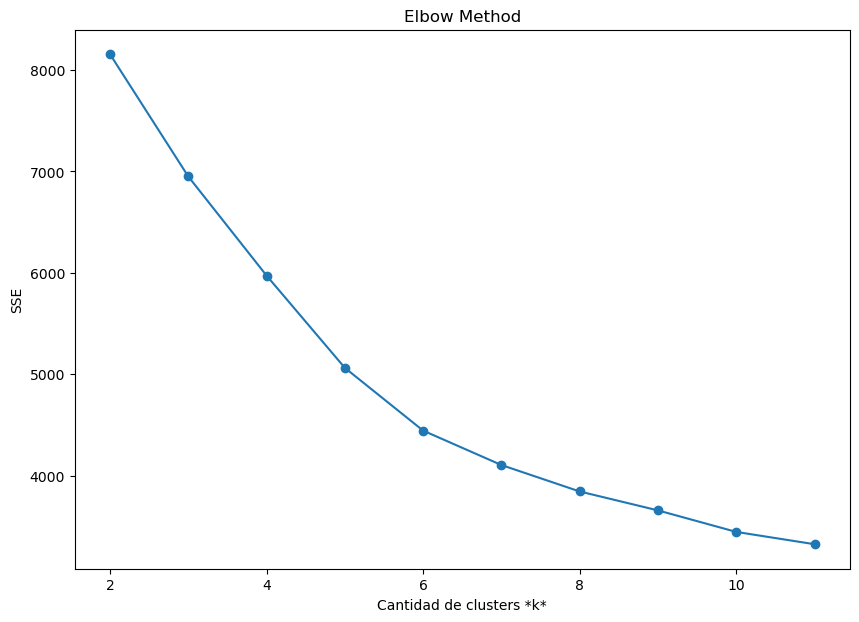

In [13]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, 12): #valores que tomará la k del algoritmo, mínimo valor 2, máximo 12
    km = KMeans(n_clusters=i, random_state=0) #random_State es un estado inicial que ayuda a que los resultados sean reproducibles, si se deja como 'none',
                                              # se obtendrán resultados ligeramente diferentes. El valor debe de ser un entero y estará en función de los      
                                              # elementos que tengamos, si tenemos 202 elementos, el valor máximo del random_state podria ser 202! (factorial)      
    km.fit(MEstandarizada)                    ### preguntar al profesor ###
    SSE.append(km.inertia_)                   ### está enlistando los valores obtenidos con su cierta "inercia" ###

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [14]:
!pip install kneed

In [15]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing") #Se utiliza cuando es ambigüo.
kl.elbow

6

#### Observamos que coinciden con el número de clases que tenemos

In [16]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=6, random_state=0).fit(MEstandarizada) 


C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
MParticional.fit(MEstandarizada)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [18]:
MParticional.labels_

array([3, 2, 3, ..., 2, 2, 1])

In [19]:
Vinos['clusterP'] = MParticional.labels_
Vinos

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,clusterP
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,3
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,3
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,5
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [20]:
print(Vinos.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [21]:
CentroidesQ = Vinos.groupby(['quality'])['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol'].mean()
CentroidesQ

C:\Users\Principal\AppData\Local\Temp\ipykernel_2416\1625514417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesQ = Vinos.groupby(['quality'])['fixed.acidity',


,fixed.acidity,residual.sugar,chlorides,free.sulfur.dioxide,sulphates,alcohol
quality,,,,,,
3,8.360000,2.635000,0.122500,11.000000,0.570000,9.955000
4,7.779245,2.694340,0.090679,12.264151,0.596415,10.265094
5,8.167254,2.528855,0.092736,16.983847,0.620969,9.899706
6,8.347179,2.477194,0.084956,15.711599,0.675329,10.629519
7,8.872362,2.720603,0.076588,14.045226,0.741256,11.465913
8,8.566667,2.577778,0.068444,13.277778,0.767778,12.094444


In [22]:
print(Vinos.groupby('clusterP').size())

clusterP
0     27
1    330
2    298
3    609
4     70
5    265
dtype: int64


In [23]:
CentroidesP = Vinos.groupby(['clusterP'])['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol'].mean()
CentroidesP

C:\Users\Principal\AppData\Local\Temp\ipykernel_2416\2073122051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesP = Vinos.groupby(['clusterP'])['fixed.acidity',


,fixed.acidity,residual.sugar,chlorides,free.sulfur.dioxide,sulphates,alcohol
clusterP,,,,,,
0,8.459259,1.981481,0.367481,15.555556,1.275926,9.470370
1,7.331515,2.300000,0.071694,13.003030,0.663091,11.836111
2,7.958725,2.334732,0.081839,30.857383,0.656174,10.129418
3,7.813300,2.153695,0.085488,11.465517,0.588834,9.758511
4,7.982857,7.668571,0.091729,23.728571,0.655429,10.425238
5,11.194340,2.652453,0.088328,10.694340,0.751283,10.616855


* **Clúster 0:** Es un grupo formado por 27 elementos con una acidez fija (ácido tartárico) del 8.459 (g/dm^3), azucar residual de 1.981 (g/dm^3), cloruros (cloruro de sodio) de 0.367 (g/dm^3), dióxido de azufre libre de 15.555 (g/dm^3), sulfatos (sulfato de potasio) de 1.275 (g/dm^3) y un volumen de alcohol del 9.47%.
* **Clúster 1:** Es un grupo formado por 330 elementos con una acidez fija (ácido tartárico) del 7.331 (g/dm^3), azucar residual de 2.3 (g/dm^3), cloruros (cloruro de sodio) de 0.0716 (g/dm^3), dióxido de azufre libre de 13.003 (g/dm^3), sulfatos (sulfato de potasio) de 0.663 (g/dm^3) y un volumen de alcohol del 11.83%
* **Clúster 2:** Es un grupo formado por 298 elementos con una acidez fija (ácido tartárico) del 7.958 (g/dm^3), azucar residual de 2.334 (g/dm^3), cloruros (cloruro de sodio) de 0.0818 (g/dm^3), dióxido de azufre libre de 30.857 (g/dm^3), sulfatos (sulfato de potasio) de 0.656 (g/dm^3) y un volumen de alcohol del 10.12%
* **Clúster 3:** Es un grupo formado por 609 elementos con una acidez fija (ácido tartárico) del 7.813 (g/dm^3), azucar residual de 2.153 (g/dm^3), cloruros (cloruro de sodio) de 0.0854 (g/dm^3), dióxido de azufre libre de 11.465 (g/dm^3), sulfatos (sulfato de potasio) de 0.588 (g/dm^3) y un volumen de alcohol del 9.75%
* **Clúster 4:** Es un grupo formado por 70 elementos con una acidez fija (ácido tartárico) del 7.982 (g/dm^3), azucar residual de 7.668 (g/dm^3), cloruros (cloruro de sodio) de 0.091 (g/dm^3), dióxido de azufre libre de 23.728 (g/dm^3), sulfatos (sulfato de potasio) de 0.655 (g/dm^3) y un volumen de alcohol del 10.42%
* **Clúster 5:** Es un grupo formado por 265 elementos con una acidez fija (ácido tartárico) del 11.194 (g/dm^3), azucar residual de 2.652 (g/dm^3), cloruros (cloruro de sodio) de 0.088 (g/dm^3), dióxido de azufre libre de 10.694 (g/dm^3), sulfatos (sulfato de potasio) de 0.751 (g/dm^3) y un volumen de alcohol del 10.61%

# III Modelos - AD&BA

#### **3) Definición de las variables predictoras y variable clase**


In [24]:
#Variables predictoras
X = np.array(Vinos[['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol']])
pd.DataFrame(X)

,0,1,2,3,4,5
0,7.4,1.9,0.076,11.0,0.56,9.4
1,7.8,2.6,0.098,25.0,0.68,9.8
2,7.8,2.3,0.092,15.0,0.65,9.8
3,11.2,1.9,0.075,17.0,0.58,9.8
4,7.4,1.9,0.076,11.0,0.56,9.4
...,...,...,...,...,...,...
1594,6.2,2.0,0.090,32.0,0.58,10.5
1595,5.9,2.2,0.062,39.0,0.76,11.2
1596,6.3,2.3,0.076,29.0,0.75,11.0
1597,5.9,2.0,0.075,32.0,0.71,10.2


In [25]:
#Variable clase
Y = np.array(Vinos[['clusterP']])
pd.DataFrame(Y)

,0
0,3
1,2
2,3
3,5
4,3
...,...
1594,2
1595,2
1596,2
1597,2


### **II. Creación de los modelos**

In [26]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [28]:
print(len(X_train))
print(len(X_validation))

1279
320


### **Modelo 1: Árboles de decisión (AD)**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionAD = DecisionTreeClassifier(random_state=0)
ClasificacionAD.fit(X_train, Y_train)

#ClasificacionAD = DecisionTreeClassifier(min_samples_split=8, 
#                                         min_samples_leaf=4,
#                                         random_state=0)
#ClasificacionAD.fit(X_train, Y_train)

#recomendación: primero obtener el modelo con los datos por defecto, a partir de ahí, observar el comportamiento
#que tiene el modelo y de con ello, empezar a modificar los valores. Es decir, es una referencia

DecisionTreeClassifier(random_state=0)

In [31]:
#Clasificación final 
Y_ClasificacionAD = ClasificacionAD.predict(X_validation)
print(Y_ClasificacionAD)

[5 3 1 3 5 3 3 2 3 3 3 3 3 2 3 2 1 3 1 3 1 3 3 4 3 2 3 1 2 1 5 2 2 3 1 5 3
 3 1 1 2 4 1 5 1 2 3 2 3 2 3 3 4 5 5 2 2 3 5 3 3 2 2 1 3 1 3 5 5 5 2 0 3 2
 2 1 3 2 4 1 5 2 1 1 3 3 4 3 3 3 2 2 1 3 1 2 1 5 3 5 5 3 2 1 3 3 3 2 1 3 1
 3 1 4 1 2 3 1 1 3 3 5 0 3 1 1 2 5 3 5 2 3 1 1 5 3 5 3 5 3 1 3 3 3 3 5 1 5
 1 3 1 3 2 3 3 2 5 3 1 2 1 3 5 3 5 3 2 1 2 5 5 3 3 5 4 1 4 1 1 3 2 1 3 5 1
 3 2 2 2 2 1 5 3 3 3 3 3 3 3 2 2 1 3 3 2 3 3 1 5 2 1 2 0 5 3 3 5 1 3 3 3 5
 1 5 3 5 1 3 5 3 3 1 3 5 1 2 5 1 1 5 3 3 3 3 3 3 3 2 0 1 3 3 3 3 3 3 2 3 3
 5 3 1 3 5 3 3 3 4 5 2 5 3 3 1 5 2 1 2 1 5 2 1 3 5 3 3 3 3 2 5 2 1 5 5 3 1
 2 5 3 3 1 3 3 2 1 2 3 3 3 3 2 2 3 5 2 5 1 1 3 1]


In [32]:
ValoresMod1 = pd.DataFrame(Y_validation, Y_ClasificacionAD)
ValoresMod1

,0
5,5
3,3
1,1
3,3
5,5
...,...
5,1
1,1
1,1
3,3


In [33]:
accuracy_score(Y_validation, Y_ClasificacionAD)

0.946875

#### **Matriz de clasificación: Árbol de decisión**

In [34]:
#Matriz de clasificación
ModeloClasificacion1 = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion1 = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion1, 
                                   rownames=['Actual'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion1

#-Linealidad: afecta mucho a los clasificaciones, las binarias y multiples. si son linealmente separables, aunque "haya
#desbalance", no afecta en las clasificaciones y se obtienen resultados buenos, pero cuando no son linealmente separables
#sí afecta mucho el desbalance
#-desbalance o desajuste (en y, salida), le pega mucho (afecta) a la clasificación binaria sobretodo 

Clasificación,0,1,2,3,4,5
Actual,,,,,,
0,4,0,0,1,0,0
1,0,64,0,4,0,1
2,0,0,58,0,1,2
3,0,1,0,123,0,4
4,0,0,0,0,8,1
5,0,2,0,0,0,46


In [35]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionAD))
print(classification_report(Y_validation, Y_ClasificacionAD))

Criterio: 
 gini
Importancia variables: 
 [0.26695429 0.10289585 0.03284165 0.2316745  0.08360741 0.2820263 ]
Exactitud: 0.946875
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      0.93      0.94        69
           2       1.00      0.95      0.97        61
           3       0.96      0.96      0.96       128
           4       0.89      0.89      0.89         9
           5       0.85      0.96      0.90        48

    accuracy                           0.95       320
   macro avg       0.94      0.91      0.93       320
weighted avg       0.95      0.95      0.95       320



#### **Eficiencia y conformación del modelo de clasificación**
* En la matriz de confusión se utilizó 303 instancias de prueba, clasificándose de manera errónea 17 casos. Esto hace que el modelo tenga un 94.68% de exactitud y un 100%, 96%, 100%, 96%, 89% y 85% de precisión para las clases 0, 1, 2, 3, 4 y 5, respectivamente.

* Por otro lado, el error promedio es de 16%.

In [36]:
ImportanciaMod1 = pd.DataFrame({'Variable': list(Vinos[['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol']]),
                                'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaMod1

,Variable,Importancia
5,alcohol,0.282026
0,fixed.acidity,0.266954
3,free.sulfur.dioxide,0.231674
1,residual.sugar,0.102896
4,sulphates,0.083607
2,chlorides,0.032842


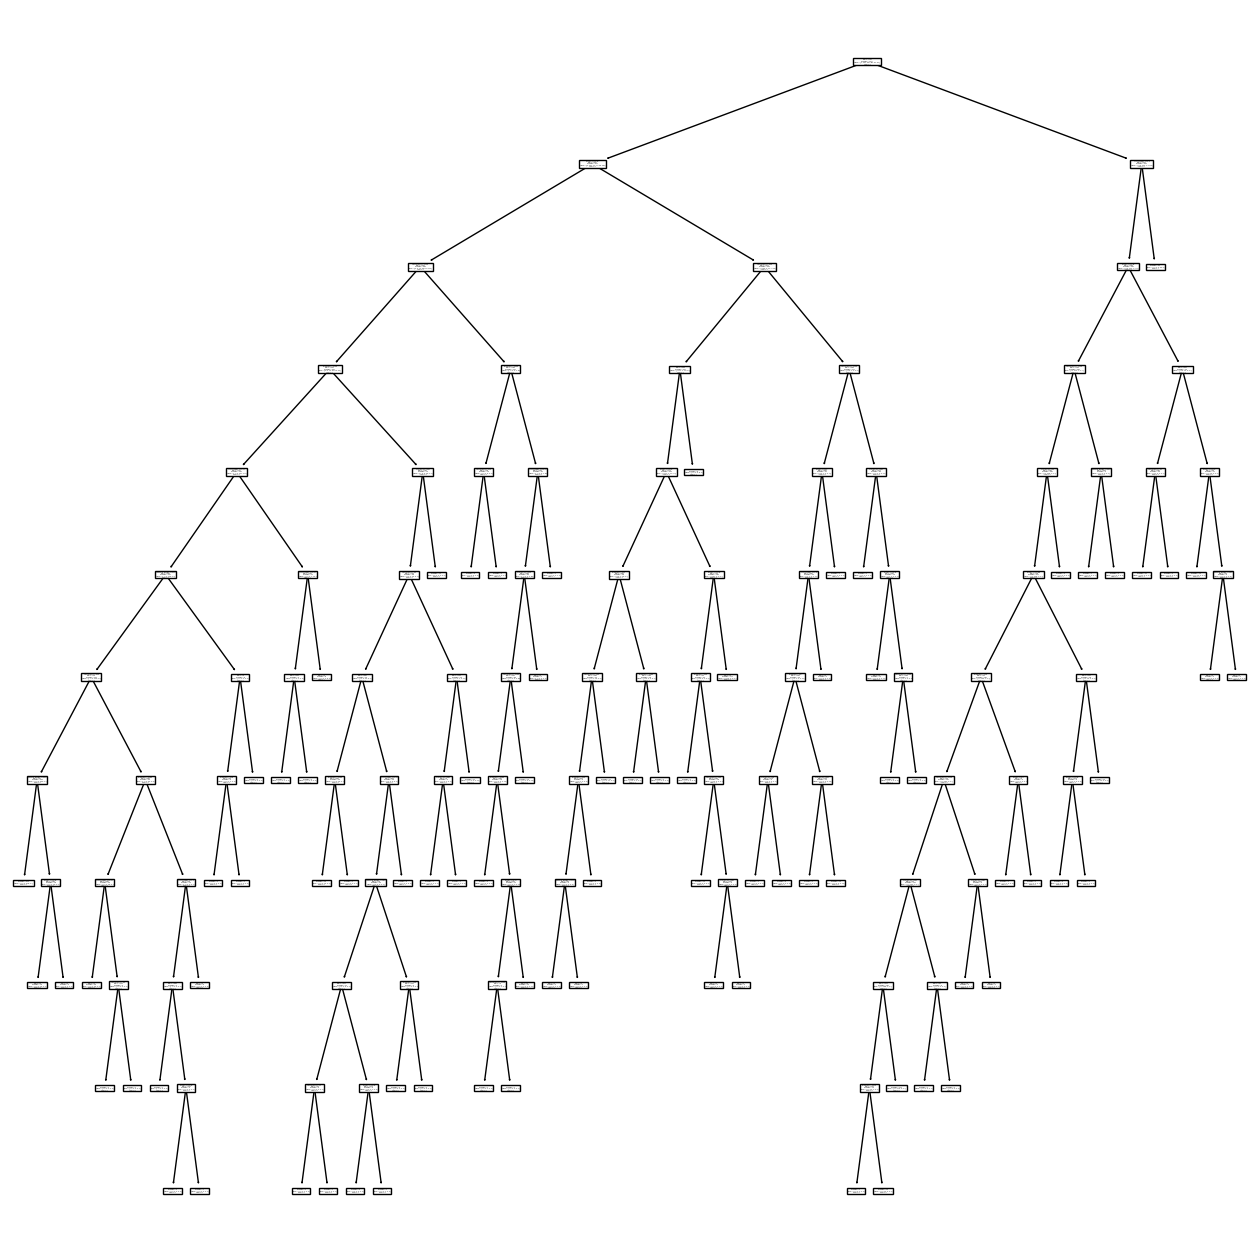

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, 
          feature_names = ['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol'],
         class_names = ['3', '4', '5', '6', '7', '8'])
plt.show()

#podamos al rededor la mitad para evitar el sobreajuste (min_samples_split o niveles de profunidad)
#también aumentamos el número de elementos por hoja, mínimo 2, pero 3,4 o 5 son buenos valores

In [38]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, feature_names = ['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol'])
print(Reporte)

|--- free.sulfur.dioxide <= 22.50
|   |--- alcohol <= 10.75
|   |   |--- fixed.acidity <= 10.05
|   |   |   |--- sulphates <= 0.76
|   |   |   |   |--- residual.sugar <= 4.75
|   |   |   |   |   |--- free.sulfur.dioxide <= 21.50
|   |   |   |   |   |   |--- fixed.acidity <= 9.25
|   |   |   |   |   |   |   |--- free.sulfur.dioxide <= 20.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- free.sulfur.dioxide >  20.50
|   |   |   |   |   |   |   |   |--- alcohol <= 10.05
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- alcohol >  10.05
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- fixed.acidity >  9.25
|   |   |   |   |   |   |   |--- sulphates <= 0.66
|   |   |   |   |   |   |   |   |--- residual.sugar <= 2.95
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- residual.sugar >  2.95
|   |   |   |   |   |   |   |   |   |--- fixed.acidity <= 9.60
|   |  

### **Modelo 2: Bosques aleatorios (BA)**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
ClasificacionBA = RandomForestClassifier(random_state=0)
ClasificacionBA.fit(X_train, Y_train)

#ClasificacionBA = RandomForestClassifier(n_estimators=100, ---> aumentar
#                                         max_depth=11,  ---> disminuir
#                                         min_samples_split=4, 
#                                         min_samples_leaf=2, 
#                                         random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

C:\Users\Principal\AppData\Local\Temp\ipykernel_2416\1913988339.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [41]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

[5 3 1 3 5 3 3 2 3 3 3 3 3 2 3 2 1 3 1 3 1 3 3 4 3 2 3 1 2 1 5 2 2 3 1 5 3
 3 1 1 2 4 1 5 1 2 3 2 3 2 3 3 4 5 5 2 2 3 5 3 3 3 2 1 3 1 3 5 5 5 2 0 3 2
 2 1 3 2 4 1 5 2 1 3 3 3 4 3 3 3 2 2 1 3 1 2 1 5 3 5 4 3 2 1 1 3 1 2 1 3 1
 3 1 4 1 2 3 1 1 3 3 5 0 3 1 1 2 5 3 5 2 3 1 1 5 3 5 3 5 3 1 3 3 3 3 5 1 5
 1 3 1 3 2 3 3 3 5 3 1 2 1 3 5 3 5 3 2 1 2 5 5 3 3 5 4 1 4 1 1 3 2 1 3 5 1
 3 2 2 2 2 1 5 3 3 3 3 3 3 3 2 2 1 3 3 2 3 3 1 5 2 1 2 0 5 3 3 5 1 3 3 3 5
 1 5 3 5 1 3 5 3 3 1 3 2 1 2 5 1 1 5 3 3 3 3 3 3 3 2 0 1 3 3 3 3 3 3 2 3 3
 5 3 1 3 5 3 3 3 4 3 2 3 3 3 1 5 2 1 2 1 5 2 1 3 5 3 3 3 3 2 5 2 1 5 5 3 1
 2 3 3 3 1 3 3 2 1 2 3 3 3 3 2 2 3 5 2 1 1 1 3 1]


In [42]:
ValoresMod2 = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresMod2

,0
5,5
3,3
1,1
3,3
5,5
...,...
1,1
1,1
1,1
3,3


In [43]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.96875

#### **Matriz de clasificación: Bosques aleatorios**

In [44]:
#Matriz de clasificación
ModeloClasificacion2 = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion2 = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion2

Clasificación,0,1,2,3,4,5
Reales,,,,,,
0,4,0,0,1,0,0
1,0,67,0,2,0,0
2,0,0,57,2,1,1
3,0,0,0,127,0,1
4,0,0,0,0,9,0
5,0,2,0,0,0,46


In [45]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.22741028 0.10566743 0.06378156 0.27000977 0.08851478 0.24461618]
Exactitud: 0.96875
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.97      0.97      0.97        69
           2       1.00      0.93      0.97        61
           3       0.96      0.99      0.98       128
           4       0.90      1.00      0.95         9
           5       0.96      0.96      0.96        48

    accuracy                           0.97       320
   macro avg       0.97      0.94      0.95       320
weighted avg       0.97      0.97      0.97       320



In [62]:
reporte = classification_report(Y_validation, Y_ClasificacionBA, output_dict=True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte = df_reporte.round(2)
df_reporte

,precision,recall,f1-score,support
0,1.00,0.80,0.89,5.00
1,0.97,0.97,0.97,69.00
2,1.00,0.93,0.97,61.00
3,0.96,0.99,0.98,128.00
4,0.90,1.00,0.95,9.00
5,0.96,0.96,0.96,48.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.94,0.95,320.00
weighted avg,0.97,0.97,0.97,320.00


#### **Eficiencia y conformación del modelo de clasificación**
* En la matriz de confusión se utilizó 310 instancias de prueba, clasificándose de manera errónea 10 casos. Esto hace que el modelo tenga un 96.87% de exactitud y un 100%, 97%, 100%, 96%, 90% y96% de precisión para las clases 0, 1, 2, 3, 4 y 5, respectivamente.

* Por otro lado, el error promedio es casi el 13%.

In [46]:
Importancia2 = pd.DataFrame({'Variable': list(Vinos[['fixed.acidity',
                    'residual.sugar',
                    'chlorides',
                    'free.sulfur.dioxide',                    
                    'sulphates',
                    'alcohol']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia2

,Variable,Importancia
3,free.sulfur.dioxide,0.270010
5,alcohol,0.244616
0,fixed.acidity,0.227410
1,residual.sugar,0.105667
4,sulphates,0.088515
2,chlorides,0.063782


# **III. Validación**


In [51]:
print("Árbol de decisión:", accuracy_score(Y_validation, Y_ClasificacionAD))
print("Bosque aleatorio:", accuracy_score(Y_validation, Y_ClasificacionBA))

Árbol de decisión: 0.946875
Bosque aleatorio: 0.96875


In [48]:
#Rendimiento
from sklearn.preprocessing import label_binarize
y_score = ClasificacionBA.predict_proba(X_validation)
y_test_bin = label_binarize(Y_validation, classes=[0, 
                                                   1, 
                                                   2,
                                                   3,
                                                   4,
                                                   5])
n_classes = y_test_bin.shape[1]

AUC para la clase 0: 0.9999999999999999
AUC para la clase 1: 0.9981234482360413
AUC para la clase 2: 0.9976897271979239
AUC para la clase 3: 0.9988810221354167
AUC para la clase 4: 0.997856377277599
AUC para la clase 5: 0.9978936887254902


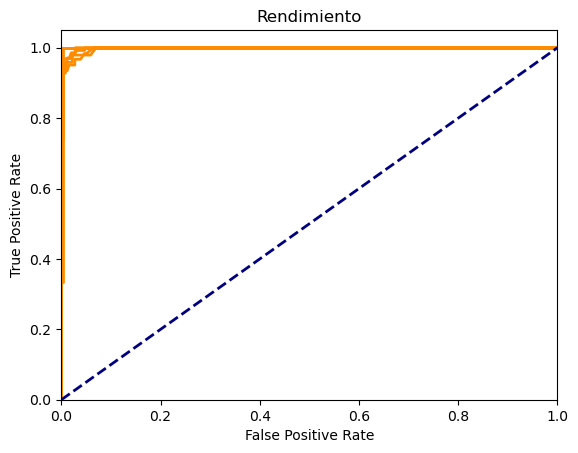

In [49]:
#Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC para la clase {}: {}'.format(i,auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

# **IV. Nuevas clasificaciones**


In [ ]:
#Calidad del Vino
Calidad = pd.DataFrame({'fixed.acidity':[7.4],
                    'residual.sugar':[1.9],
                    'chlorides':[0.076],
                    'free.sulfur.dioxide':[11.0],        
                    'sulphates':[0.56],
                    'alcohol':[9.4]})
ClasificacionBA.predict(Calidad)